In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
movies = pd.read_csv('movie.csv')

In [4]:
# read in and explore data
movies.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


# Data analyses 

# Opschonen Dataset
Bij het opschonen van de dataset kunnen we een variabele 'selection' maken die de kolommen meeneemt uit bovenstaande selectie:

In [5]:
selection = movies[['movie_title', 'title_year', 'imdb_score', 'movie_facebook_likes', 'director_name', 'gross', 'duration', 'num_voted_users', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'genres']]

In [6]:
selection.dropna(subset=['movie_title'], inplace=True)
selection.dropna(thresh=14, inplace=True)
selection.drop_duplicates(subset=None, keep='first', inplace=True)

In [7]:
selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']] = selection[['title_year', 'gross', 'duration', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].fillna(value=0)
selection = selection.astype({'title_year': int, 'gross': int, 'duration': int, 'actor_1_facebook_likes': int, 'actor_2_facebook_likes': int, 'actor_3_facebook_likes': int})
selection.set_index('movie_title', inplace=True)
selection.head(10)

,title_year,imdb_score,movie_facebook_likes,director_name,gross,duration,num_voted_users,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,genres
movie_title,,,,,,,,,,,,,,
Avatar,2009,7.9,33000,James Cameron,760505847,178,886204,CCH Pounder,Joel David Moore,Wes Studi,1000,936,855,Action|Adventure|Fantasy|Sci-Fi
Pirates of the Caribbean: At World's End,2007,7.1,0,Gore Verbinski,309404152,169,471220,Johnny Depp,Orlando Bloom,Jack Davenport,40000,5000,1000,Action|Adventure|Fantasy
Spectre,2015,6.8,85000,Sam Mendes,200074175,148,275868,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000,393,161,Action|Adventure|Thriller
The Dark Knight Rises,2012,8.5,164000,Christopher Nolan,448130642,164,1144337,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000,23000,Action|Thriller
John Carter,2012,6.6,24000,Andrew Stanton,73058679,132,212204,Daryl Sabara,Samantha Morton,Polly Walker,640,632,530,Action|Adventure|Sci-Fi
Spider-Man 3,2007,6.2,0,Sam Raimi,336530303,156,383056,J.K. Simmons,James Franco,Kirsten Dunst,24000,11000,4000,Action|Adventure|Romance
Tangled,2010,7.8,29000,Nathan Greno,200807262,100,294810,Brad Garrett,Donna Murphy,M.C. Gainey,799,553,284,Adventure|Animation|Comedy|Family|Fantasy|Musi...
Avengers: Age of Ultron,2015,7.5,118000,Joss Whedon,458991599,141,462669,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000,19000,Action|Adventure|Sci-Fi
Harry Potter and the Half-Blood Prince,2009,7.5,10000,David Yates,301956980,153,321795,Alan Rickman,Daniel Radcliffe,Rupert Grint,25000,11000,10000,Adventure|Family|Fantasy|Mystery


Door selection.dtypes te gebruiken kunnen we zien dat elke kolom nu in het gewenste formaat staat:

# Wat is de invloed op populariteit van een film als er een populaire acteur wordt gecast?

- bereken de populariteit van een acteur -> naam linken aan facebook-likes
- bereken de populariteit van een film -> film linken aan imdb-score

In [8]:
actor_1_name = selection['actor_1_name']
actor_2_name = selection['actor_2_name']
actor_3_name = selection['actor_3_name']

actor_1_facebook_likes = selection['actor_1_facebook_likes']
actor_2_facebook_likes = selection['actor_2_facebook_likes']
actor_3_facebook_likes = selection['actor_3_facebook_likes']

movie_title = selection.index.values.tolist()
imdb_score = selection['imdb_score']

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]), <a list of 9 Text xticklabel objects>)

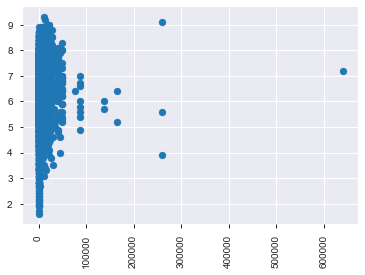

In [9]:
# plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(actor_1_facebook_likes,imdb_score)
plt.xticks(rotation=90)

Wat er duidelijk naar voren komt in het grafiek hierboven is dat er wel degelijk een correlatie is tussen imdb_score van een film en de populariteit van een acteur gemeten met facebook likes. 
Echter zijn er ook  gevallen waarin de facebook likes niet veel over de film zelf vertelt. In het voorbeeld hierboven speelt de acteur met de meeste likes niet in een film die het best heeft gescoord op imdb.

In [16]:
# import plotly.express as px
# iris = px.data.iris()
# fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
#               color='species')
# fig.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(actor_1_facebook_likes, imdb_score, test_size = 0.2, random_state = 0)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [12]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3890, 1) (3890, 1)
(973, 1) (973, 1)


In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

fit functie gebruiken op de train_set om de test_set te voorspellen

In [14]:
predictions[0:5]

array([[6.48406123],
       [6.39517825],
       [6.37644616],
       [6.37414632],
       [6.48961641]])

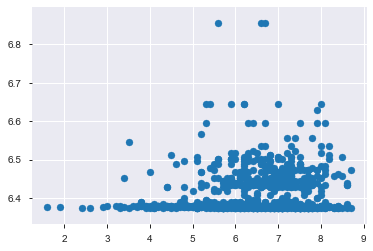

In [36]:
plt.scatter(y_test,predictions)
# x true values en y predictions

In [37]:
lr_score = model.score(X_test,y_test) * 100

In [38]:
lr_score

0.9596415643765122

In [39]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

Voor het Gaussian algoritme moeten we de float-waarden in de 2D-array converten naar int-waarden

In [40]:
y_train2 = y_train.astype(int)
y_test2 = y_test.astype(int)

gs = GaussianNB()
model_gs = gs.fit(X_train,y_train2)
predictions_gs = gs.predict(X_test)

gs_score = model_gs.score(X_test,y_test2) * 100

In [41]:
gs_score

34.42959917780062

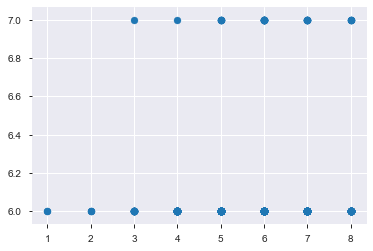

In [42]:
plt.scatter(y_test2,predictions_gs) # hier nog even verder naar kijken; wat betekent het

In [43]:
from sklearn.svm import SVC

svc = SVC()
model_svc = svc.fit(X_train, y_train2)
predictions_svc = svc.predict(X_test)

svc_score = model_svc.score(X_test,y_test2) * 100

In [44]:
svc_score

34.943473792394656

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train, y_train2)
predictions_dt = dt.predict(X_test)

dt_score = model_dt.score(X_test,y_test2) * 100

In [47]:
dt_score

31.96300102774923

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train, y_train2)
predictions_knn = knn.predict(X_test)

knn_score = model_knn.score(X_test,y_test2) * 100

In [50]:
knn_score

31.551901336073996

In [51]:
from sklearn.linear_model import Perceptron

In [52]:
perceptron = Perceptron()
model_perceptron = perceptron.fit(X_train, y_train2)
predictions_perceptron = perceptron.predict(X_test)

perceptron_score = model_perceptron.score(X_test,y_test2) * 100

In [53]:
perceptron_score

6.3720452209660845

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
randomforest = RandomForestClassifier()
model_randomforest = randomforest.fit(X_train, y_train2)
predictions_randomforest = randomforest.predict(X_test)

randomforest_score = model_randomforest.score(X_test,y_test2) * 100

In [57]:
randomforest_score

33.19630010277492

In [58]:
from sklearn.linear_model import SGDClassifier

In [59]:
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train, y_train2)
predictions_sgd = sgd.predict(X_test)

sgd_score = model_sgd.score(X_test, y_test2) * 100

In [60]:
sgd_score

34.943473792394656

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbk = GradientBoostingClassifier()

model_gbk = gbk.fit(X_train, y_train2)
predictions_gbk = gbk.predict(X_test)

gbk_score = model_gbk.score(X_test, y_test2) * 100

In [63]:
gbk_score

34.224049331963

In [64]:
vergelijking = pd.DataFrame({'Model':['Logistic Regression','Gaussian','SVC','Decision Tree','Kneighbors','Perceptron','SGDClassifier','GradientBoostingClassifier'],'Score': [lr_score,gs_score,svc_score,dt_score,knn_score,perceptron_score,sgd_score,gbk_score]})
vergelijking.sort_values(by='Score',ascending=False)

,Model,Score
2,SVC,34.943474
6,SGDClassifier,34.943474
1,Gaussian,34.429599
7,GradientBoostingClassifier,34.224049
3,Decision Tree,31.963001
4,Kneighbors,31.551901
5,Perceptron,6.372045
0,Logistic Regression,0.959642


In [72]:
num_voted_users = selection[selection['num_voted_users'] == 0]
print(len(num_voted_users)) 

0
